In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [11]:
%load_ext autoreload
%autoreload 2



In [10]:
import torch
from diffusers import StableDiffusionPipeline
from progress_capturer import ProgressCapturer




if not torch.cuda.is_available():
    pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", safety_checker=None)
    if torch.backends.mps.is_available():
        pipe = pipe.to("mps")
else:
    pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, safety_checker=None).to("cuda:0")


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

You have passed `None` for safety_checker to disable its functionality in <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>. Note that this might lead to problems when using <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> and is not recommended.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [25]:
pc = ProgressCapturer(pipe)
i = pipe("an astronaut riding a horse, abstract digital art", num_inference_steps=10, width=384, height=512, callback=pc).images
pci = pc.get_images()
i[0]

  0%|          | 0/11 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/HackHarvard/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/j0/ghv2yj8d0wd8lckpngtvjylm0000gn/T/ipykernel_21739/3259729723.py", line 3, in <cell line: 3>
    pci = pc.get_images()
  File "/Users/dmelcer9/Developer/Fun/HackHarvard/progress_capturer.py", line 17, in get_images
    images = self.pipe.vae.decode(latents).sample
  File "/opt/homebrew/anaconda3/envs/HackHarvard/lib/python3.10/site-packages/diffusers/models/vae.py", line 576, in decode
    z = self.post_quant_conv(z)
  File "/opt/homebrew/anaconda3/envs/HackHarvard/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1357, in _call_impl
    return forward_call(*input, **kwargs)
  File "/opt/homebrew/anaconda3/envs/HackHarvard/lib/python3.10/site-packages/torch/nn/modules/conv.py", line 463, in forward
    return self._conv_forward(in

In [29]:
with torch.no_grad():
    latents = torch.stack(pc.latents).reshape(11, 4, 64, 48)

    latents = 1 / 0.18215 * latents
    images = pipe.vae.decode(latents).sample

    images = (images / 2 + 0.5).clamp(0, 1)

    images = images.cpu().permute(0, 2, 3, 1).float().numpy()
    p = pipe.numpy_to_pil(images)


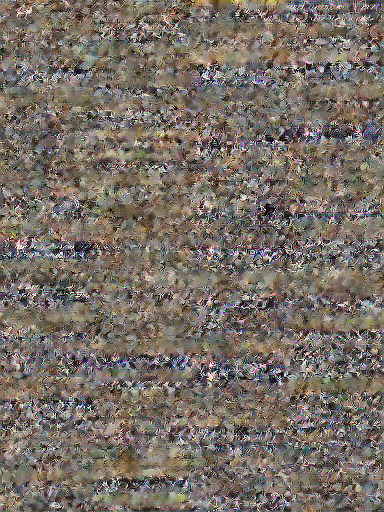

In [37]:
p[9]

In [ ]:
from RealESRGAN import RealESRGAN

In [ ]:
model = RealESRGAN("mps", scale=2)
model.load_weights("weights/RealESRGAN_x2.pth", download=True)

In [ ]:
model.predict(i[0].convert("RGB"))